In [1]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict

if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [2]:
??matplotlib.style.use

In [3]:
env = BlackjackEnv()

In [1]:
def mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    """
    Monte Carlo prediction algorithm. Calculates the value function
    for a given policy using sampling.
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Number of episodes to sample.
        discount_factor: Lambda discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """

    
    def return_following_state(episode, discount_factor=discount_factor):
        """returns the total discounted reward in the sequence, sums over the list of the mapping of a *dicount_factor**step"""
        rewards = np.array([episode_tuple[2] for episode_tuple in episode])
        discounted_rewards = list(map(lambda index, reward: reward * (discount_factor**index) ,range(len(rewards)) ,rewards))
        return np.sum(discounted_rewards)
        
    
    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # The final value function
    V = defaultdict(float)
    
for i_episode in range(num_episodes):
        #generate an episode
        episode = []
        observation = env.reset()
        done = False
        while not done:
            action = np.random.choice(a=list(range(env.nA)), p=policy(observation))
            new_observation , reward, done, _ = env.step(action)
            episode.append((observation, action, reward, new_observation))
            observation = new_observation
        print(episode)
        
        states = [episode_tuple[0] for episode_tuple in episode]
        
        for index, state in enumerate(states):
            returns_count[state] += 1
            returns_sum[state] += return_following_state(episode[index:])
            V[state] = returns_sum[state] / returns_count[state]
        
    return V    

IndentationError: unindent does not match any outer indentation level (<ipython-input-1-28e7374545dc>, line 45)

In [124]:
mc_prediction(sample_policy, env, num_episodes=1000)

[((19, 4, False), 1, -1, (23, 4, False))]
[((19, 10, False), 1, -1, (29, 10, False))]
[((15, 4, False), 1, 0, (19, 4, False)), ((19, 4, False), 1, -1, (28, 4, False))]
[((16, 8, False), 1, -1, (24, 8, False))]
[((20, 10, False), 0, -1, (20, 10, False))]
[((17, 5, False), 1, -1, (24, 5, False))]
[((20, 1, True), 0, 0, (20, 1, True))]
[((13, 10, False), 1, -1, (23, 10, False))]
[((18, 10, True), 1, 0, (17, 10, False)), ((17, 10, False), 1, -1, (22, 10, False))]
[((20, 5, True), 0, 1, (20, 5, True))]
[((19, 10, False), 1, -1, (23, 10, False))]
[((20, 2, False), 0, 1, (20, 2, False))]
[((13, 10, False), 1, -1, (22, 10, False))]
[((17, 10, False), 1, -1, (22, 10, False))]
[((17, 10, True), 1, 0, (17, 10, False)), ((17, 10, False), 1, -1, (22, 10, False))]
[((13, 2, False), 1, -1, (23, 2, False))]
[((20, 4, False), 0, 0, (20, 4, False))]
[((20, 3, False), 0, 1, (20, 3, False))]
[((15, 2, False), 1, -1, (24, 2, False))]
[((13, 1, False), 1, 0, (17, 1, False)), ((17, 1, False), 1, -1, (25, 1, 

defaultdict(float, {})

In [48]:
np.random.choice([0,1],p=[1,0])

0

In [92]:
ones = [1] * 5
y = 4
list(map(lambda x: x +1*y, ones))

[5, 5, 5, 5, 5]

In [13]:
a = defaultdict(float) 

In [121]:
def return_following_state(episode, discount_factor):
        """returns the total discounted reward in the sequence, sums over the list of the mapping of a *dicount_factor**step"""
        rewards = np.array([episode_tuple[2] for episode_tuple in episode])
        discounted_rewards = list(map(lambda index, reward: reward * (discount_factor**index) ,range(len(rewards)) ,rewards))
        return np.sum(discounted_rewards)

In [122]:
??return_following_state([((12, 8, False), 1, 0, (13, 8, False)), ((13, 8, False), 1, 0, (20, 8, False)), ((20, 8, False), 0, 1, (20, 8, False))], 1)

In [110]:
list(range(4))

[0, 1, 2, 3]

In [16]:
def sample_policy(observation):
    """
    A policy that sticks if the player score is > 20 and hits otherwise.
    """
    score, dealer_score, usable_ace = observation
    return np.array([1.0, 0.0]) if score >= 20 else np.array([0.0, 1.0])

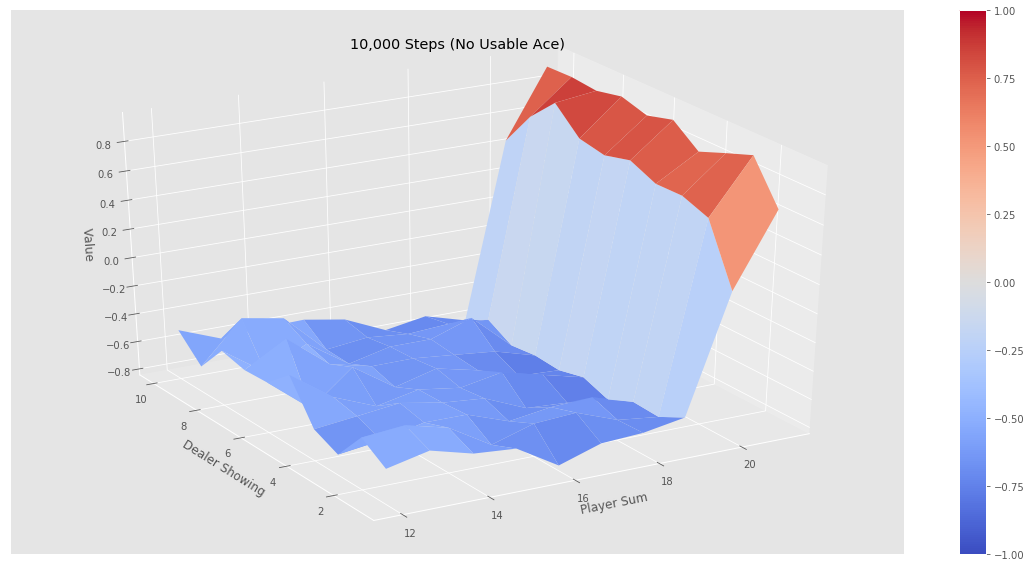

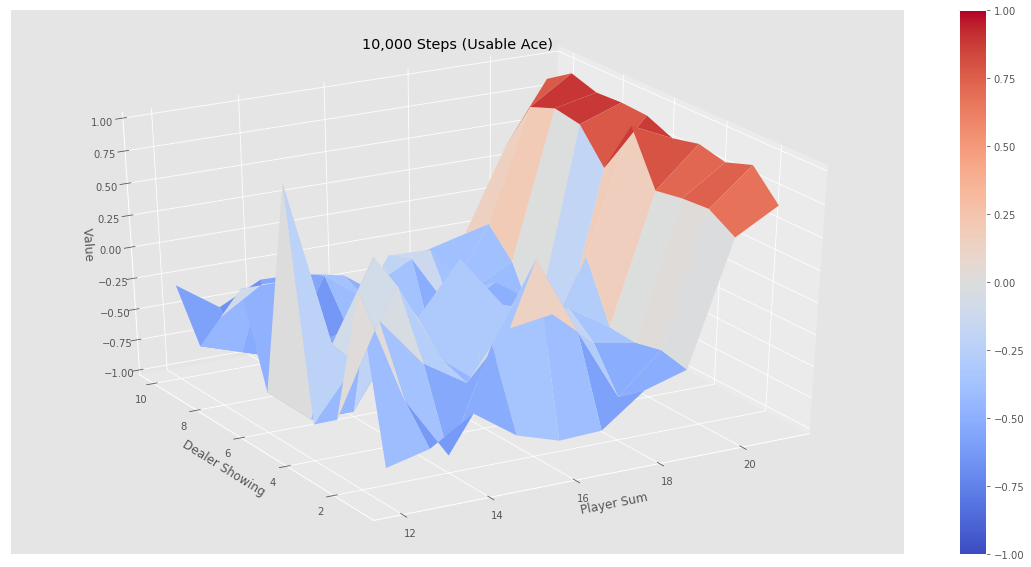

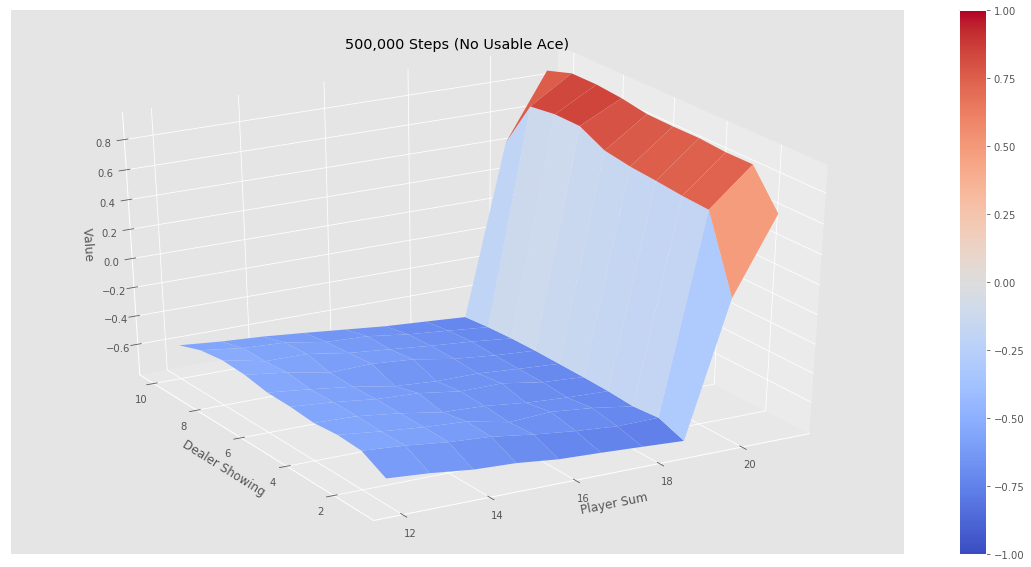

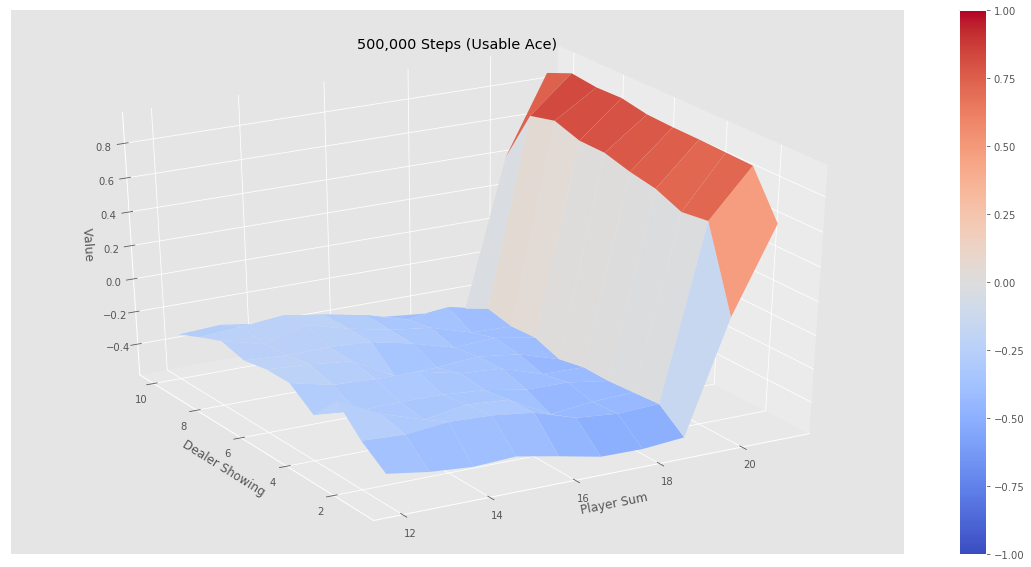

In [127]:
V_10k = mc_prediction(sample_policy, env, num_episodes=10000)
plotting.plot_value_function(V_10k, title="10,000 Steps")

V_500k = mc_prediction(sample_policy, env, num_episodes=500000)
plotting.plot_value_function(V_500k, title="500,000 Steps")

In [17]:
sample_policy((10,1,1))

array([ 0.,  1.])

SyntaxError: invalid syntax (<ipython-input-86-0424d2eb7424>, line 1)